<a href="https://colab.research.google.com/github/marparven1/MACHINE_LEARNING/blob/master/Feed_Forward_Network_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Refs.
# https://victorzhou.com/blog/keras-neural-network-tutorial/
# https://wtfleming.github.io/2019/04/21/keras-mnist/

# Preparación de los datos

11490434/11490434 [==============================] - 2s 0us/step
Training dims  (60000, 784)
Testing dims  (10000, 784)


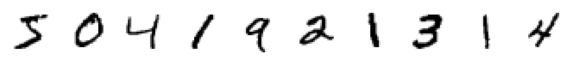

In [ ]:
# Preparing data 
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load mnist data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display some images
_, ax = plt.subplots(1, 10, figsize=(10,10))
for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

# Image Normalization
# Centered data simplifies learning.
train_samples = (train_images / 255.0) - 0.5
test_samples = (test_images / 255.0) - 0.5

# Flatten the images.
train_samples = train_samples.reshape((-1, 784))
test_samples = test_samples.reshape((-1, 784))

print("Training dims ", train_samples.shape) # (60000, 784)
print("Testing dims ", test_samples.shape)  # (10000, 784)

# Creación de la red neuronal y entrenamiento

In [ ]:
# Model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Model
model = Sequential()
model.add( Dense(16, activation='relu', input_shape=(784,)) )
model.add( Dense(10, activation='softmax') )

# Display model details
model.summary()

# Model optimization
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_samples,
    to_categorical(train_labels),
    epochs=100,
    batch_size=32,
    validation_data=(test_samples,to_categorical(test_labels))
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 9s 3ms/step - loss: 0.5614 - accuracy: 0.8380 - val_loss: 0.3505 - val_accuracy: 0.8977
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3499 - accuracy: 0.8986 - val_loss: 0.3172 - val_accuracy: 0.9075
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3170 - accuracy: 0.9087 - val_loss: 0.2954 - val_accuracy: 0.9152
Epoch 4/100
1

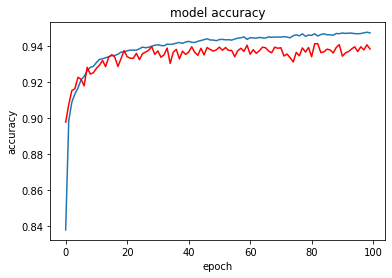

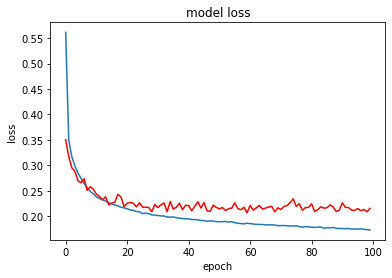

In [ ]:
# Visualization of training results
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Visualization of some testing images

# Prediction for the first 10 images of test set
predictions = model.predict(test_samples[:10])

for i in range(0, 10):
  plt.figure()
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.show()
  print( predictions[i] )

# Ejercicio 1

Modifique la red de la sección anterior para que tenga dos capas ocultas de 128 neuronas cada una. Observe y discuta la evolución de la función de loss y accuracy tanto en training como en validation. Analice las funciones de activación utilizadas. 


# Ejercicio 2

Implemente una red neuronal que permita clasificar las imágenes del dataset que se describe en: https://keras.io/api/datasets/cifar10/